# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = r'C:\Users\Vatche\Documents\Udacity\traffic-signs-data\train.p'
testing_file = r'C:\Users\Vatche\Documents\Udacity\traffic-signs-data\test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.
import numpy as np

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:4]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

C:\Users\Vatche\Miniconda3\envs\carnd-term1\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


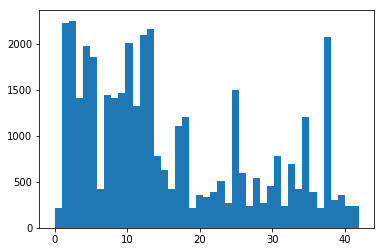

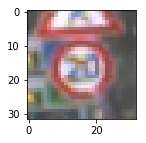

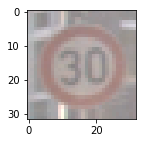

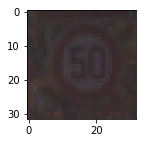

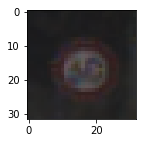

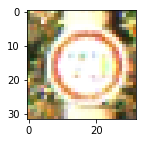

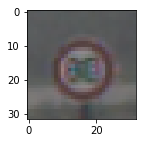

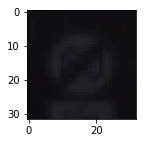

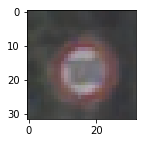

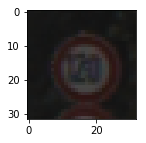

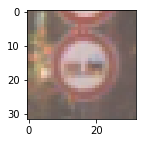

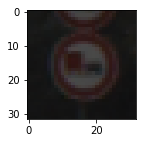

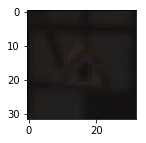

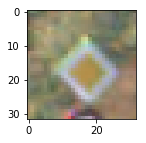

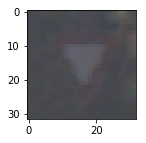

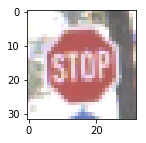

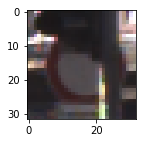

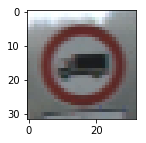

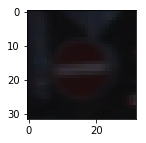

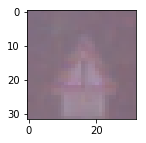

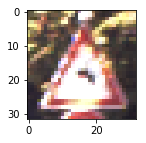

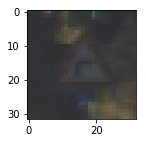

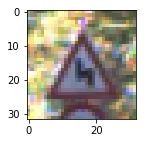

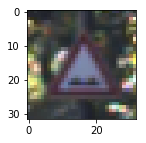

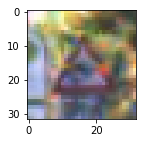

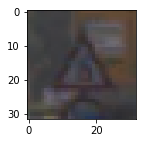

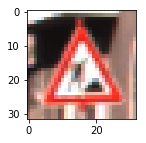

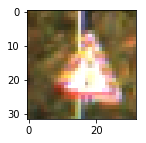

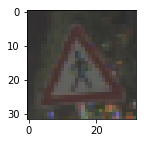

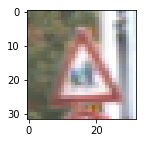

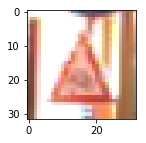

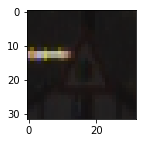

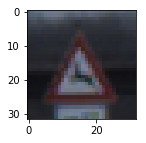

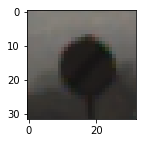

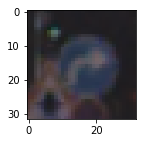

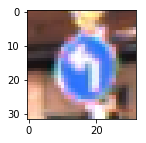

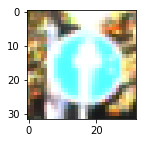

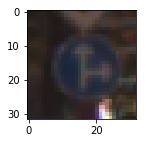

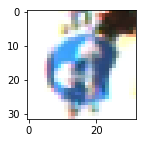

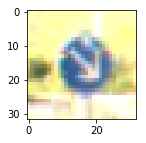

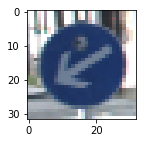

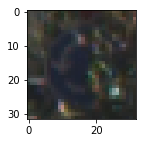

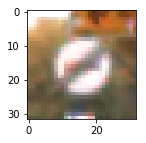

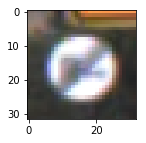

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

#create histogram plot of the training data
num_bins = n_classes
fig, ax = plt.subplots()
n, bins, patches = ax.hist(y_train, num_bins)

#plot each unique traffic sign
used_nums = []
for i in range(len(X_train)):
    if y_train[i] not in used_nums:
        used_nums.append(y_train[i])
        image = X_train[i].squeeze()
        plt.figure(figsize=(2,2))
        plt.imshow(image)

In [4]:
print(used_nums)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [5]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

#normalize the data
xmin=0
xmax=255
a=0.1
b=0.9

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_tr_norm = a + ((X_train-xmin)*(b-a))/(xmax-xmin)
X_te_norm = a + ((X_test-xmin)*(b-a))/(xmax-xmin)

#shuffle the data:
from sklearn.utils import shuffle
X_tr_norm, y_train = shuffle(X_tr_norm, y_train)
print(y_train)
print(X_tr_norm)

[ 7 18  5 ...,  2 35  8]
[[[[ 0.19411765  0.18470588  0.1909804 ]
   [ 0.19725491  0.18784314  0.1909804 ]
   [ 0.18156862  0.17215687  0.18156862]
   ..., 
   [ 0.17215687  0.16588235  0.16901961]
   [ 0.16901961  0.16588235  0.16901961]
   [ 0.16901961  0.16901961  0.17215687]]

  [[ 0.18470588  0.18156862  0.18784314]
   [ 0.17843138  0.17843138  0.18470588]
   [ 0.18156862  0.17843138  0.18784314]
   ..., 
   [ 0.15960784  0.15960784  0.1627451 ]
   [ 0.1627451   0.1627451   0.16901961]
   [ 0.16901961  0.16901961  0.17529413]]

  [[ 0.18470588  0.18470588  0.19725491]
   [ 0.18784314  0.18784314  0.19411765]
   [ 0.1909804   0.18784314  0.20039216]
   ..., 
   [ 0.1564706   0.15960784  0.1627451 ]
   [ 0.15960784  0.1627451   0.17215687]
   [ 0.17215687  0.17215687  0.18156862]]

  ..., 
  [[ 0.1627451   0.16588235  0.16901961]
   [ 0.16588235  0.17215687  0.17843138]
   [ 0.17843138  0.18470588  0.18784314]
   ..., 
   [ 0.15333334  0.15960784  0.17215687]
   [ 0.20039216  0.2066

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** I chose to normalize the data and then shuffle. Normalization I chose because it keeps the values all in the same region; if not, there are numbers ranging from 0 to 255 and this makes the neural network have more difficulty in training the weights. I actually tried without normalizing first and then decided I needed better accuracy. I did not convert to grayscale because I believe the color in the photos will be another step to help the CNN classify the traffic signs. After normalizing, I shuffled the data so that the network does not figure out a shortcut pattern for classification.

In [6]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

#split the training data into training and validation:
from sklearn.model_selection import train_test_split
X_trn, X_val, y_trn, y_val = train_test_split(X_tr_norm, y_train, test_size=0.3)

print("Length of Training Set:")
print(len(X_trn))
print("Length of Validation Set:")
print(len(X_val))


Length of Training Set:
27446
Length of Validation Set:
11763


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** I normalized both the training and test data in the preprocessing section. Here I split the training data into training and validation sets, in order to validate data before using the test set. I allocated 30% of the data to validation.

In [74]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf

EPOCHS = 50
BATCH_SIZE = 16
rate = 0.001

In [75]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    #Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    #Activation.
    conv1 = tf.nn.relu(conv1)

    #Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    #Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    #Activation.
    conv2 = tf.nn.relu(conv2)

    #Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    #Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    #Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    #Activation.
    fc1    = tf.nn.relu(fc1)

    #Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    #Activation.
    fc2    = tf.nn.relu(fc2)

    #Add a dropout layer before the readout layer
    fc_do = tf.nn.dropout(fc2, keep_prob)
    
    #Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** The final architecture is a Convoluted Neural Network (CNN), using the LeNet model. It has two sets of convolution/activation/max pool layers, then a flattening, then two sets of fully connected/activation layers. I also added a dropout before the output layer, which is used to make sure the network does not overfit. This dropout layer was not part of the LeNet model. Finally, a fully connected layer is sent as logits to the remaining code. I tried adding another convolution layer, however the performance decreaesed so I reverted to the layers used above.

In [76]:
### Train your model here.
### Feel free to use as many code cells as needed.
tf.reset_default_graph()
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)

#training pipeline
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [77]:
#model evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [78]:
#train model
savefile='./vatche.ckpt'

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_trn)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_trn, y_trn = shuffle(X_trn, y_trn)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_trn[offset:end], y_trn[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.5})
            
        validation_accuracy = evaluate(X_val, y_val)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, savefile)
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.889

EPOCH 2 ...
Validation Accuracy = 0.939

EPOCH 3 ...
Validation Accuracy = 0.958

EPOCH 4 ...
Validation Accuracy = 0.970

EPOCH 5 ...
Validation Accuracy = 0.965

EPOCH 6 ...
Validation Accuracy = 0.969

EPOCH 7 ...
Validation Accuracy = 0.959

EPOCH 8 ...
Validation Accuracy = 0.976

EPOCH 9 ...
Validation Accuracy = 0.967

EPOCH 10 ...
Validation Accuracy = 0.971

EPOCH 11 ...
Validation Accuracy = 0.970

EPOCH 12 ...
Validation Accuracy = 0.980

EPOCH 13 ...
Validation Accuracy = 0.962

EPOCH 14 ...
Validation Accuracy = 0.960

EPOCH 15 ...
Validation Accuracy = 0.981

EPOCH 16 ...
Validation Accuracy = 0.978

EPOCH 17 ...
Validation Accuracy = 0.981

EPOCH 18 ...
Validation Accuracy = 0.983

EPOCH 19 ...
Validation Accuracy = 0.983

EPOCH 20 ...
Validation Accuracy = 0.980

EPOCH 21 ...
Validation Accuracy = 0.983

EPOCH 22 ...
Validation Accuracy = 0.978

EPOCH 23 ...
Validation Accuracy = 0.983

EPOCH 24 ...
Validation Accura

In [79]:
#Model Testing
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_te_norm, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.914


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:** I used the Adam optimizer that we used previously with LeNet. I started with a batch size of 128, epochs of 10, and learning rate of 0.001. After trial and error adjusting the parameters, I found that I needed more epochs to get a better set of weights, and also when I decreased the batch size, the data validated more accuratley. The learning rate was adjusted too, but any smaller was taking too many epochs to improve to the performance I wanted. I added 50% dropout for the training, but made sure to not perform any dropout during validation or testing. Once I was satisfied with the training accuracy, I tested the model and received an accuracy of 91.4%. This is very good considiering it is data that has not been passed through the system yet.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:** I used the LeNet system to start with, and then adjusted the parameters such as batch size, epochs, and learning rate as stated above. When I needed better accuracy, I added dropout and reduced the batch size. I attemped to add another convoluted layer to the system, but this was making my accuracy drop, possibly due to overfitting. I think the LeNet framework is suitable to this problem because it splits up the 32x32 image data in an even manner, providing many different filter layers for a pattern to get recognized. It also does not matter whether it is one layer deep (grayscale) or 3 layers deep (colors) as long as you change the dimensions of the filters accordingly.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

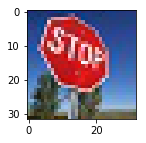

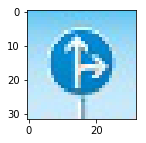

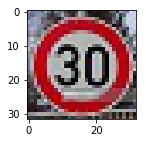

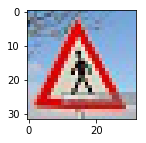

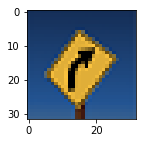

In [81]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import matplotlib.image as mpimg

image1=mpimg.imread(r'C:\Users\Vatche\Documents\Udacity\5 traffic signs\sign1.jpg')
image2=mpimg.imread(r'C:\Users\Vatche\Documents\Udacity\5 traffic signs\sign2.jpg')
image3=mpimg.imread(r'C:\Users\Vatche\Documents\Udacity\5 traffic signs\sign3.jpg')
image4=mpimg.imread(r'C:\Users\Vatche\Documents\Udacity\5 traffic signs\sign4.jpg')
image5=mpimg.imread(r'C:\Users\Vatche\Documents\Udacity\5 traffic signs\sign5.png')

plt.figure(figsize=(2,2))
plt.imshow(image1)
plt.figure(figsize=(2,2))
plt.imshow(image2)
plt.figure(figsize=(2,2))
plt.imshow(image3)
plt.figure(figsize=(2,2))
plt.imshow(image4)
plt.figure(figsize=(2,2))
plt.imshow(image5)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:** image 3 and 4 have watermarks on them, so it may be difficult. image 5 is a yellow sign (american version of right turn ahead) so it might throw the network off. all have blue skies in the background and some signs are blue so it may mess with the classification as well.

In [82]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

#delete 4th layer for the png image:
print(image5.shape)
u=np.delete(image5,3,2)
print(u.shape)

image1 = image1.astype('float32')
image2 = image2.astype('float32')
image3 = image3.astype('float32')
image4 = image4.astype('float32')
image5 = u.astype('float32')

im1_norm = a + ((image1-xmin)*(b-a))/(xmax-xmin)
im2_norm = a + ((image2-xmin)*(b-a))/(xmax-xmin)
im3_norm = a + ((image3-xmin)*(b-a))/(xmax-xmin)
im4_norm = a + ((image4-xmin)*(b-a))/(xmax-xmin)
im5_norm = a + ((u-xmin)*(b-a))/(xmax-xmin)

signs=[]
signs.append(im1_norm)
signs.append(im2_norm)
signs.append(im3_norm)
signs.append(im4_norm)
signs.append(u)

sign_f32=np.array(signs)
print(sign_f32.dtype)

(32, 32, 4)
(32, 32, 3)
float32


In [91]:
#load data
y_new=[14, 36, 1, 27, 38]

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, savefile)
    
    test_accuracy = evaluate(sign_f32,y_new)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.600


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:** My model is able to perform okay with other images from the internet. The accuracy is 60%, so that means 3 out of 5 images were recognized well. This means some of the stuff like uncertainties were more than the model could handle.

The prediction accuracy is 60%. This is compared to an accuracy of 91.4% from the test data run. This shows that the model does not work as well in a real world situation, with more outside disturbances. Possible reasons are that the brightness of the photos are different, or the orientation of the images, or the face that they are different sizes in the image. The neural network was set up and the convolutions help the network recognize certain traits or aspects of the photos, so there needs to be more work done to make the network robust to new images.

In [93]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

#with tf.Session as sess:

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    prediction = tf.nn.softmax(logits)
    topFive=tf.nn.top_k(prediction,k=5)

    topKs = sess.run(topFive, feed_dict = {x:sign_f32,keep_prob:1.0})

    values=np.array([topKs.values])
    indices=np.array([topKs.indices])
    print(values)
    print(indices)


[[[ 0.03061622  0.03035636  0.02992748  0.02975393  0.02962213]
  [ 0.02925882  0.02825909  0.02766037  0.02700092  0.02646815]
  [ 0.03300021  0.03199568  0.03173157  0.02958167  0.02855018]
  [ 0.03018757  0.02990934  0.02954844  0.0291423   0.02837489]
  [ 0.02945703  0.02919409  0.02845182  0.02822776  0.0280481 ]]]
[[[25 42 10 11 14]
  [10 25 21 11 29]
  [42 12 29 10 36]
  [10 42 25 12 11]
  [42 10 23 14 25]]]


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:** it seems as though my model is uncertain of all of these predictions, as the values of the softmax are all very close to each other.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.